# MATS64662 2021 Group 1 - RSEP-Team-AWS
## Python code demonstration

This document has been written to describe how Group 1's code can be applied to begin hydride morphology analysis and testing on sample micrograph images. Once you understand how this one example works, other images can be analysed following these steps.


First call in the appropriate modules, from the downloaded repository (this uses the file structure we have provided).

In [1]:
#call in modules
from Pyfunctions import skhydride as skh
from Pyfunctions import hough_measurebox as hmb
from Pyfunctions import RHF_prop as RHF

from skimage import io
import numpy as np

## Blurring an image

Read in an image, this uses `skimage.io` to convert images to a numerical array.

Checking the image shape is useful, as it gives you an approximate idea of what kind of sizes you would expect for the respective hydrides in your image (in pixels). This may come in useful later, though it is not required.

In [2]:
image1 = io.imread(fname='data\sample_micrographs\chu1.jpg') #read in chu1.jpg
image1.shape #gives the shape of the array

(312, 316, 4)

We will use the following conditions for `skblur` a function contained within `skhydride`, this is the function we will use for image blurring to reduce noise and the influence of smaller objects. It uses a *Gaussian blur*, for which these conditions were selected.

`skblur`
   - **imarray** = your image
   - **sigma (user_1)** = 0.5
   - **truncation (user_1)** = 3, a value of 3 here encompasses 99.9% of the data concerned in the Gaussian blur.
   
   
Type `help(skblur)` to open the docstring and see a description, the required inputs and outputs.

In [4]:
help(skh.skblur)

Help on function skblur in module Pyfunctions.skhydride:

skblur(imarray, user_1, user_2)
    skblur uses scikit image to apply greyscale to an .jpg image and then 
    apply a Gaussian blur, based on specficied inputs. First run "jpg_list" 
    function to provide a convenient list of jpp files to input, the specify 
    arguments. 
    
    After the function has run, it will save an image of size equal to your 
    original image called "blurred_image_YOURFILENAME." 
    
    Parameters
    ----------
    imarray: array
        image array
    user_1: float
        sigma value for Gaussian blur, reccommended 0<x<1
    user_2: float
        gaussian truncation value, truncates the filter after this many 
        standard deviations 
        
    Returns
    -------
    blurarray: array
        blurred image array



Read the below syntax, the inputs have been entered as discussed above.

We equate the output of `skblur` to a kernel variable named *im1_blurred*, this is just a name that we will recognise for the newly blurred image.

After this, the image is ready to convert to binary

D:\alexf\Documents\CDT 2020\MATS64662 Research Software Engineering\Repository\Pyfunctions\skhydride.py:47: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  grayscale_image = rgb2gray(imarray) #image is converted to greyscale (note: this creates a float value array)


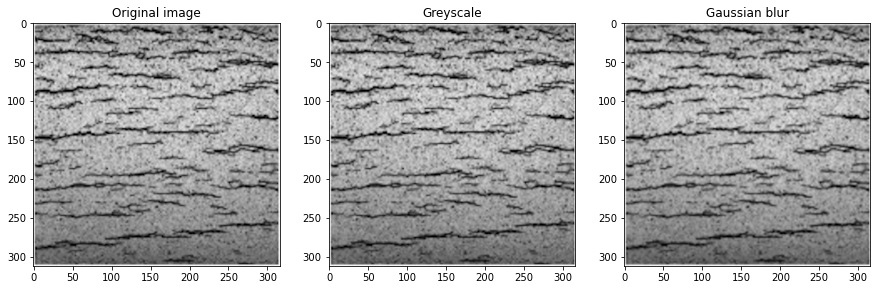

In [5]:
im1_blurred = skh.skblur(image1, 0.5, 3) 

## Making an image binary

Again, call the docstring on the function `skbinary` - our thresholding function.

In [6]:
help(skh.skbinary)

Help on function skbinary in module Pyfunctions.skhydride:

skbinary(blurarray, user_thres)
    skbinary converts images to binary using manual thresholding, first run 
    "skblur" on an image, select your threshold value, which should be <1.0, 
    and then run the function.
    
    Parameters
    ----------
    blurarray: array 
        blurred image array to be processed.
    user_thres: int/float 
        threshold set for the binary thresholding
    
    Returns
    -------
    binary_image: array
        binary image array



This requires the inputs: 

`skbinary`

   - **blurarray** = the previously blurred image
   - **threshold** = 0.4

It was found that a threshold of 0.4 worked for *image1 (Chu 1)* nicely, but this depends on the image and desired condition. **Ensure threshold < 1.0**.

You will see where your threshold has been applied in respect to the image value histogram, and the final result. The histogram may help you pick a respective threshold, as it shows the distribution of pixel intensity.

The output of the function is set to another kernel variable *im1_binary*.

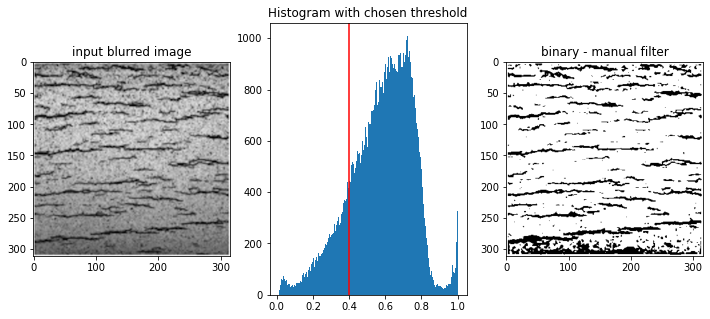

In [7]:
im1_binary = skh.skbinary(im1_blurred, 0.4)

See above result, the image appears binary to the human eye.

However we should check this in terms of python, call the variable to check that it is it truely binary (expressed in integer values of 1 and 0). You can simply type the name of the variable, and the *Numpy* array data will be printed.

In [8]:
im1_binary

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

From the preview, we can see here that is it integer binary values (at least that we can see). A value of 1 corresponds to white in the previous image.

## Assessing morphology of hydrides - radial hydride fraction

We will not begin the analysis processing using the radial hydride approach based on a relationship from [Colas et al, 2013](https://www.sciencedirect.com/science/article/abs/pii/S0022311513006557)

Load in `hough_measurebox`, and use the help function to see it's arguments:

In [15]:
help(hmb.hough_measurebox)

Help on function hough_measurebox in module Pyfunctions.hough_measurebox:

hough_measurebox(bin_array, background, min_line_dist, min_line_angle, fraction, peak_no)
    hough_meaurebox is a function that performs a hough transform of the given 
    array (or binary image) which has been sliced according to labelled image 
    regions from skimage label and ndimage. This was based on the previous 
    function hough_measure and code by M. Maric (HAPPy). 
    
    Hough lines are plotted for each object detected from the hough peaks onto 
    the input image in rectangles which are generated from the object size. 
    Before using, ensure your array is binary (dtype=int). 
    
    The image will be labelled into regions according to skimage.measure.label, 
    for this you choose background type. Connectivity is defined as the number 
    of dimensions equal to that in the original image.
    
    Parameters
    ----------
    
    bin_array: array 
        Binary image
    
    backgro

**Above**

There are many inputs here to consider for this function and it may seem overwhelming, however the docstring gives some reccommendations on what values to input. Though keep in mind, they made need some optimisation for a given image.

Below we will apply the reccommended inputs that were found to work nicely for image 1:

`hough_measurebox`

   - **background value** = 1 (white)
   - **minimum line separation distance** = 5
   - **minimum angle between lines** = 5
   - **fraction** = 0.3 (30%)
   - **peak number** = 5
   
Read the syntax carefully below to see these inputs.

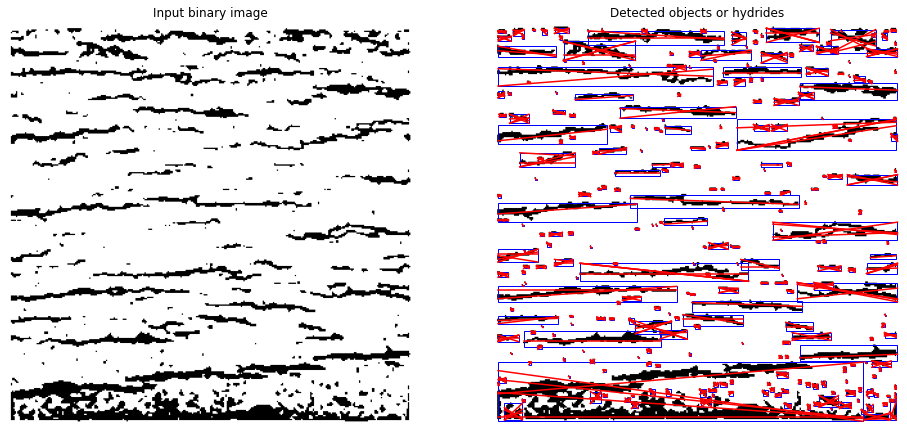

In [13]:
im1_hough = hmb.hough_measurebox(im1_binary, 1, 5, 5, 0.3, 5)

We can see here many hydrides have been detected as separate objects, however the detection is not perfect and we see a very large object originating at the bottom - possible the product of darkening or noise in the image. These are things to consider. 

After `hough_measurebox` has been applied, you can call the array to see its output corresponding to the above image for your own interest. You have a series of hydride angles and heights in pixel, which describe size.

This array can be interpretted to calculate the radial hydride fraction, the proportion of hydrides that are orientated radially (in the vertical direction).


In [18]:
im1_hough

array([[-75.84269663,  12.        ],
       [ 85.95505618,  11.        ],
       [ 63.70786517,   9.        ],
       ...,
       [-45.50561798,  10.        ],
       [ 43.48314607,  10.        ],
       [ 27.30337079,   8.        ]])

## Finding ***radial hydride fraction***

In [17]:
help(RHF.RHF_prop)

Help on function RHF_prop in module Pyfunctions.RHF_prop:

RHF_prop(hough_measure_array)
    This functions calculates the proportion of radial hydrides by assessing 
    each angle by the criteria created by (Colas, 2013). However, it is 
    modified for use with hough_measure.py, as angles are taken in respect 
    to the y-axis using this function as opposed to in respect to the 
    circumferential direction.
    
    
     Parameters
    ----------
    hough_measure_array: array 
        the output of the hough_measure function, angles and heights.
        
    Returns
    -------
    rhf: float
        radial hydride fraction
    max: int/float
        maximum hydride size detected in pixels
    min: int/float
        maximum hydride size detected in pixels



To apply this function, simply specify the array from the previous `hmb` function as the input and it will calculate *RHF* based on the angles and heights produced.

The only input here is the hough transformed array. You will see that `RHF_prop` gives 3 outputs, and the first corresponds to the quantity of interest: **rhf**


   

In [20]:
RHF.RHF_prop(im1_hough)

(0.24, 267.0, 1.0)

We can see from the value of `0.24` above, this describes that the image contains a majority of circumferentially orientated hydrides and hence it will have a low RHF. 

However, this is not 0.0, meaning that there has been some detected hydrides that are orientated radially or at ~45 degrees. Looking back at the image from `hmb`, this is understandable.

## Congratulations
### You now know how to use this python code package!

Now you will be able to analyse your own sample micrographs in this manner if you wish.